<a href="https://colab.research.google.com/github/Ganesh9100/100-Days-Of-ML-Code/blob/master/Logistic_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [0]:
digits=load_digits()


In [38]:
print("image data shape ", digits.data.shape)    # there are 1797 images with different digits and each image has 64 pixel values 8 x 8 matrix 
print("label data shape ", digits.target.shape)   # there are 1797 images in vector as labels not as images of matrix 

image data shape  (1797, 64)
label data shape  (1797,)


In [39]:
print(digits.data[0:1])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]


In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))


x=zip(digits.data[0:5],digits.target[0:5])
x=set(x)
print(x)


TypeError: ignored

<Figure size 1440x288 with 0 Axes>

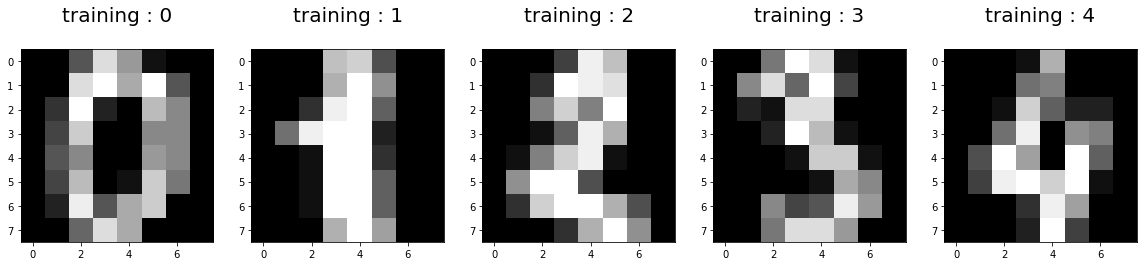

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4)) # width , height 
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])): # zip map the index of similar container and  enumerate count the iteration 
  plt.subplot(1,5,index+1) # 1 row 5 column as representated and  index + 1 is the axis as on number line in right x axis 
  plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
  plt.title('training : %i\n' %label,fontsize=20)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1383, 64)
(1383,)
(414, 64)
(414,)


In [55]:
from sklearn.linear_model import LogisticRegression
lrg=LogisticRegression()
lrg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print(lrg.predict(x_test[0].reshape(1,-1)))

[4]


In [66]:
lrg.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [0]:
predictions=lrg.predict(x_test)

In [0]:
scores=lrg.score(x_test,y_test) #Y_test is the actual output and predictions is the predicted output of x_test 

In [69]:
print(scores)

0.9516908212560387


**NOW USING CONFUSION MATRIX WE WILL FIND TO REPRESENT THE ACCURACY**

In [0]:
from sklearn import metrics

In [0]:
cm=metrics.confusion_matrix(y_test,predictions) # ytest and the out predicted values for ytest

In [72]:
print(cm) # IF U ADD UP ALL THE NUMBERS IN THE BELOW MATRIX IT WILL BE HTE SAMME AS NO OF TEST DATA 

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


**HERE THE DIAGONAL VALUE SHOULD BE VERY HIGH , IT REPRESENT THE ACTUAL VALUE IS EQUAL TO PREDICTED VALUE**

**FROM INDEX 0 TO 9 BOTH THE AXIS , LABEL 0,0 IS 37 , THIS MEANS Y AXIS IS ACTUAL VALUE , X- AXIS IS PREDICTED ONE . SO THE ACTUAL VALUE OF 0 IS PREDICTED SAME AS ACTUAL VALUE FOR 37 TIMES AND 1 IMAGE IS MIS PREDICTED AS 4 RATHER TO PREDICT 0**

Text(0.5, 1.0, 'ACCURACY SCORE 0.9516908212560387')

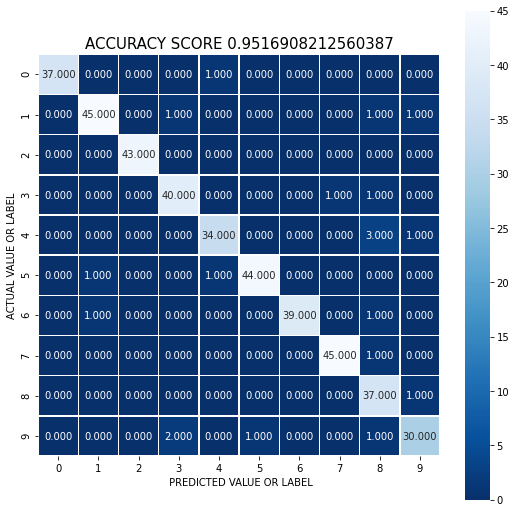

In [75]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel("ACTUAL VALUE OR LABEL")
plt.xlabel(" PREDICTED VALUE OR LABEL")
all_sample_title="ACCURACY SCORE {0}".format(scores)
plt.title(all_sample_title,size=15)

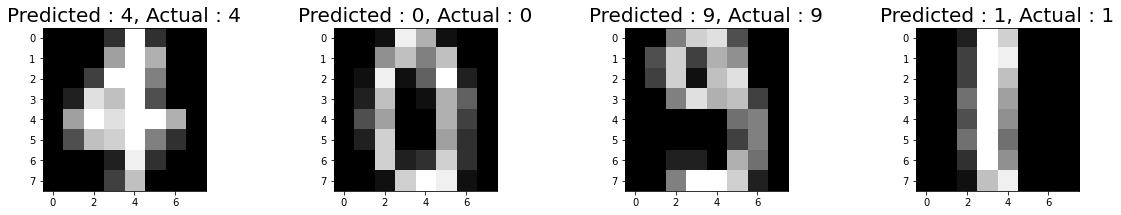

In [77]:
index=0
classifiedindex=[]
for predict,actual in zip(predictions,y_test):
  if predict == actual:
    classifiedindex.append(index)
  index=index+1

plt.figure(figsize=(20,3))

for plotindex,wrong in enumerate(classifiedindex[0:4]):
  plt.subplot(1,4,plotindex+1)
  plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
  plt.title("Predicted : {}, Actual : {}".format(predictions[wrong],y_test[wrong]),fontsize=20)